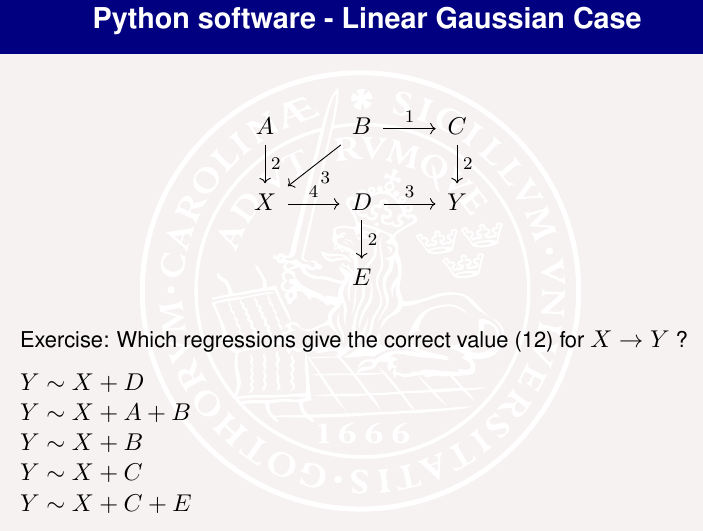

In [ ]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd

In [ ]:
N = 100000;
na = np.random.normal(0, 1, N)
nb = np.random.normal(0, 1, N)
nc = np.random.normal(0, 1, N)
nd = np.random.normal(0, 1, N)
ne = np.random.normal(0, 1, N)
nx = np.random.normal(0, 1, N)
ny = np.random.normal(0, 1, N)

a = na
b = nb
x = 2*a + 3*b + nx
c = 1*b + nc
d = 4*x + nd
e = 2*d + ne
y = 3*d + 2*c + ny

dat1 = pd.DataFrame({'a':a, 'b':b, 'c':c, 'd':d,
                     'e':e, 'd':d, 'x':x, 'y':y})

In [ ]:
# This gives the wrong result (should be 12) for causal inference X -> Y
results1 = smf.ols('y ~ x + d -1', data=dat1).fit()
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.688e+07
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                        0.00
Time:                        14:26:46   Log-Likelihood:                     -2.3473e+05
No. Observations:              100000   AIC:                                  4.695e+05
Df Residuals:                   99998   BIC:                                  4.695e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# But this works. It is parent adjustment
results2 = smf.ols('y ~ x + a + b - 1', data=dat1).fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          5.127e+06
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                        0.00
Time:                        14:30:33   Log-Likelihood:                     -2.7386e+05
No. Observations:              100000   AIC:                                  5.477e+05
Df Residuals:                   99997   BIC:                                  5.478e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# This also works. Z={B} is a valid adjustment set because of backdoor criterion
results3 = smf.ols('y ~ x + b - 1', data=dat1).fit()
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          7.691e+06
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                        0.00
Time:                        14:34:13   Log-Likelihood:                     -2.7386e+05
No. Observations:              100000   AIC:                                  5.477e+05
Df Residuals:                   99998   BIC:                                  5.477e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Z={C} also satisfies backdoor criterion, so this also works
results4 = smf.ols('y ~ x + c - 1', data=dat1).fit()
print(results4.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.079e+07
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                        0.00
Time:                        14:37:06   Log-Likelihood:                     -2.5700e+05
No. Observations:              100000   AIC:                                  5.140e+05
Df Residuals:                   99998   BIC:                                  5.140e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# But adding E giving Z={C,E} destroys the backdoor criterion. And in this case this leads to failure
results5 = smf.ols('y ~ x + c + e - 1', data=dat1).fit()
print(results5.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.563e+07
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                        0.00
Time:                        10:00:00   Log-Likelihood:                     -1.9348e+05
No. Observations:              100000   AIC:                                  3.870e+05
Df Residuals:                   99997   BIC:                                  3.870e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------